In [1]:
# import the libraries :
import os,sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')
from scipy import stats

In [2]:
data=pd.read_csv('Classified Data',\
                index_col='Unnamed: 0')

In [3]:
data.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [4]:
data.isnull().sum()

WTT             0
PTI             0
EQW             0
SBI             0
LQE             0
QWG             0
FDJ             0
PJF             0
HQE             0
NXJ             0
TARGET CLASS    0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   WTT           1000 non-null   float64
 1   PTI           1000 non-null   float64
 2   EQW           1000 non-null   float64
 3   SBI           1000 non-null   float64
 4   LQE           1000 non-null   float64
 5   QWG           1000 non-null   float64
 6   FDJ           1000 non-null   float64
 7   PJF           1000 non-null   float64
 8   HQE           1000 non-null   float64
 9   NXJ           1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 93.8 KB


In [6]:
data['TARGET CLASS'].value_counts() 

TARGET CLASS
1    500
0    500
Name: count, dtype: int64

In [7]:
df=data.copy()

In [8]:
# How to check balanced and imbalanced dataset of target values( majority class(350) > 2*minority (100) )= imbalanced class 
# oversampling = keep majority class as it is but minority class added dummies values => losing values from original  
# undersampling = randomly taking the same number of values from majority and minority class
# smote all techniques on training data  only 

In [9]:
data.describe()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,0.949682,1.114303,0.834127,0.682099,1.032336,0.943534,0.963422,1.071960,1.158251,1.362725,0.50000
std,0.289635,0.257085,0.291554,0.229645,0.243413,0.256121,0.255118,0.288982,0.293738,0.204225,0.50025
min,0.174412,0.441398,0.170924,0.045027,0.315307,0.262389,0.295228,0.299476,0.365157,0.639693,0.00000
25%,0.742358,0.942071,0.615451,0.515010,0.870855,0.761064,0.784407,0.866306,0.934340,1.222623,0.00000
50%,0.940475,1.118486,0.813264,0.676835,1.035824,0.941502,0.945333,1.065500,1.165556,1.375368,0.50000
75%,1.163295,1.307904,1.028340,0.834317,1.198270,1.123060,1.134852,1.283156,1.383173,1.504832,1.00000
max,1.721779,1.833757,1.722725,1.634884,1.650050,1.666902,1.713342,1.785420,1.885690,1.893950,1.00000


In [10]:
X=data.drop(['TARGET CLASS'],axis=1)  #independent 

In [11]:
y=data['TARGET CLASS'] # dependent 

In [12]:
X.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167


In [13]:
y.head()

0    1
1    0
2    0
3    1
4    1
Name: TARGET CLASS, dtype: int64

In [14]:
def plot_distributions(dataframe):
    for column in dataframe.columns:
        plt.figure(figsize=(10, 6))
        if dataframe[column].dtype in ['int64', 'float64']:
            sns.histplot(dataframe[column].dropna(), kde=True)  # Numerical data
        else:
            sns.countplot(y=dataframe[column], order=dataframe[column].value_counts().index)  # Categorical data
        plt.title(f'Distribution of {column}')
        plt.show()

In [15]:
#train_test_split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=101)

In [16]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(800, 10) (200, 10) (800,) (200,)


In [17]:
y_train.value_counts()

TARGET CLASS
1    406
0    394
Name: count, dtype: int64

In [18]:
#model building 
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [19]:
y_pred=knn.predict(x_test)

In [20]:
y_pred

array([0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1], dtype=int64)

In [21]:
# accuracy
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [22]:
# #Training accuracy
y_pred_train=knn.predict(x_train)
print("Training accuracy:",accuracy_score(y_train,y_pred_train))

Training accuracy: 0.955


In [23]:
#testing accuracy
y_pred_test=knn.predict(x_test)
print("Testing accuracy:",accuracy_score(y_test,y_pred_test))

Testing accuracy: 0.93


In [24]:
confusion_matrix(y_test,y_pred_test)

array([[100,   6],
       [  8,  86]], dtype=int64)

In [25]:
# How to find correct value of k == no of neigh

In [26]:
error_rate=[]
for i in range(2,30):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    error_rate.append(np.mean(y_pred!=y_test))

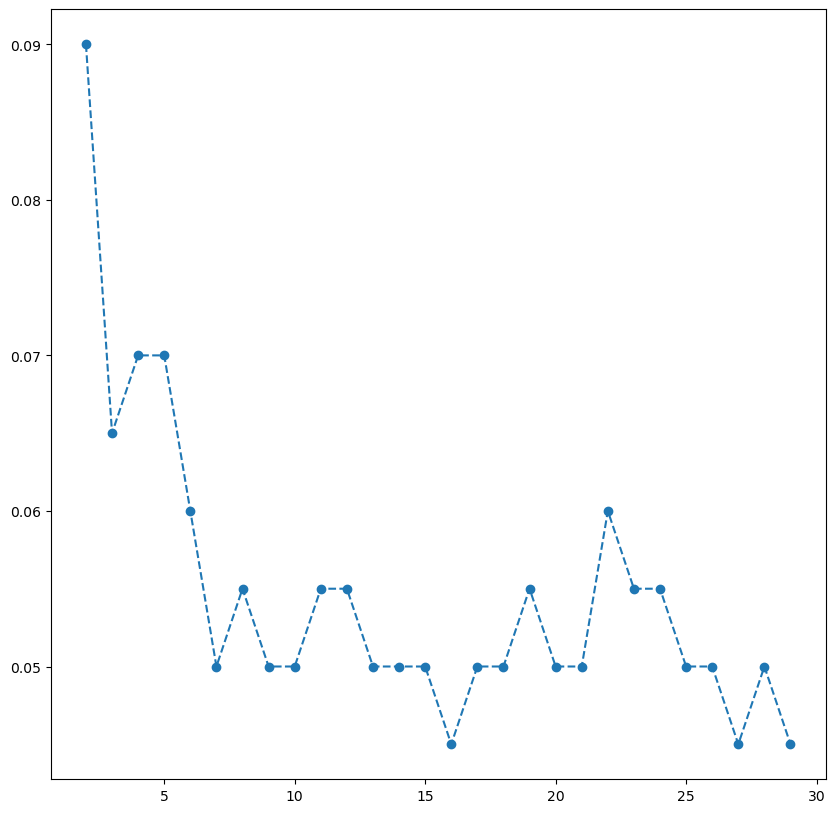

In [27]:
plt.figure(figsize=(10,10))
plt.plot(range(2,30),error_rate,linestyle='dashed',marker='o')

In [28]:
knn=KNeighborsClassifier(n_neighbors=27)
knn.fit(x_train,y_train)
y_pred_train=knn.predict(x_test)


In [29]:
print("Training accuracy:",accuracy_score(y_train,knn.predict(x_train)))
print("Testing accuracy:",accuracy_score(y_test,knn.predict(x_test)))

Training accuracy: 0.9425
Testing accuracy: 0.955


In [30]:
from sklearn.metrics import roc_auc_score

In [31]:
knn_roc_auc_score=roc_auc_score(y_test,y_pred)
print('Area under curve:',knn_roc_auc_score)

Area under curve: 0.9551384985949419


In [32]:
from sklearn.metrics import roc_curve
fpr,tpr,threshold=roc_curve(y_test,y_pred)
print(fpr,tpr,threshold)

[0.         0.04716981 1.        ] [0.         0.95744681 1.        ] [2 1 0]


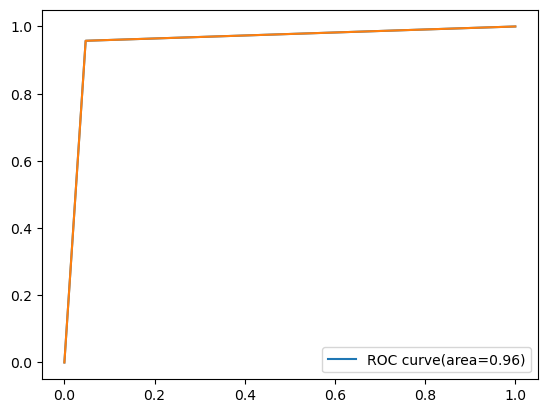

In [33]:
plt.figure()
plt.plot(fpr,tpr,label='ROC curve(area=%0.2f)'%knn_roc_auc_score)
plt.plot(fpr,tpr)
plt.legend()
plt.show()

In [34]:
# Naive Bayes Classifier

In [35]:
from sklearn.naive_bayes import GaussianNB
nv=GaussianNB()
nv.fit(x_train,y_train)

GaussianNB()

In [36]:
y_pred=nv.predict(x_test)

In [37]:
y_pred

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1], dtype=int64)

In [38]:
print("Training accuracy:",accuracy_score(y_train,nv.predict(x_train)))
print("Testing accuracy:",accuracy_score(y_test,nv.predict(x_test)))

Training accuracy: 0.94125
Testing accuracy: 0.955


In [39]:
from sklearn.svm import SVC
svm=SVC(kernel='linear')
svm.fit(x_train,y_train)

SVC(kernel='linear')

In [40]:
y_predict=svm.predict(x_test)

In [41]:
print("Training accuracy:",accuracy_score(y_train,svm.predict(x_train)))
print("Testing accuracy:",accuracy_score(y_test,svm.predict(x_test)))

Training accuracy: 0.95
Testing accuracy: 0.955


In [42]:
svm=SVC(kernel='rbf')
svm.fit(x_train,y_train)
y_predict=svm.predict(x_test)
print("Training accuracy:",accuracy_score(y_train,svm.predict(x_train)))
print("Testing accuracy:",accuracy_score(y_test,svm.predict(x_test)))

Training accuracy: 0.96375
Testing accuracy: 0.96


In [43]:
svm=SVC(kernel='poly')
svm.fit(x_train,y_train)
y_predict=svm.predict(x_test)
print("Training accuracy:",accuracy_score(y_train,svm.predict(x_train)))
print("Testing accuracy:",accuracy_score(y_test,svm.predict(x_test)))

Training accuracy: 0.965
Testing accuracy: 0.93


In [44]:
svm=SVC(kernel='sigmoid')
svm.fit(x_train,y_train)
y_predict=svm.predict(x_test)
print("Training accuracy:",accuracy_score(y_train,svm.predict(x_train)))
print("Testing accuracy:",accuracy_score(y_test,svm.predict(x_test)))

Training accuracy: 0.5075
Testing accuracy: 0.47


In [45]:
### as rbf is giving good accuracy 